In [1]:
# CASE STUDY 02
# Unsupervised Learning

# Done By : JOSHUA DAVID 

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
file_path = 'Wholesale customers data.csv'


In [5]:
data = pd.read_csv(file_path)
print("File loaded successfully!")
print("\nFirst 5 rows of the dataset:")
print(data.head())

data_for_clustering = data.drop(['Channel', 'Region'], axis=1)


File loaded successfully!

First 5 rows of the dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)
print("\nData scaled successfully!")
print("\nFirst 5 rows of scaled data:")
print(scaled_data[:5])


Data scaled successfully!

First 5 rows of scaled data:
[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 [ 0.10011141 -0.62401993 -0.3929769   0.6871443  -0.49858822  0.09341105]
 [ 0.84023948 -0.05239645 -0.07935618  0.17385884 -0.23191782  1.29934689]]


In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


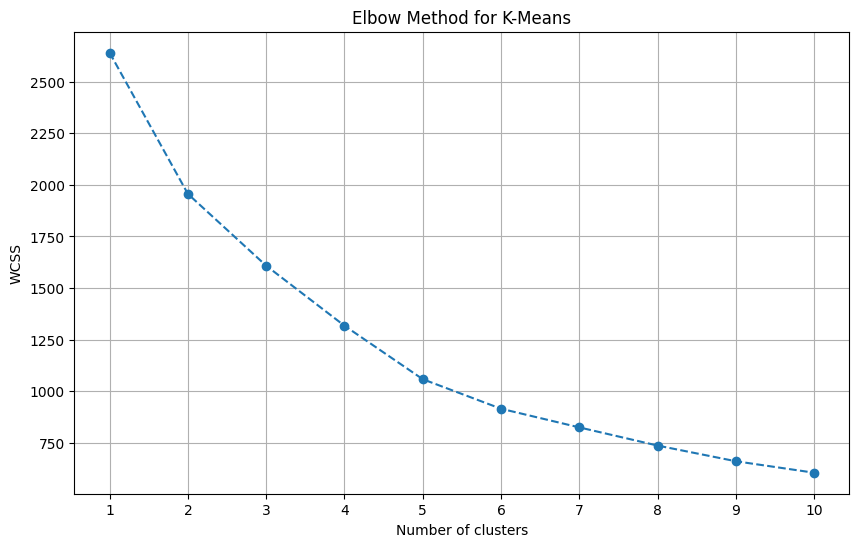

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [14]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [18]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)


In [22]:
silhouette_avg = silhouette_score(scaled_data, kmeans_labels)
print(f"For n_clusters = {optimal_k}, the Silhouette Score is: {silhouette_avg:.4f}")

For n_clusters = 5, the Silhouette Score is: 0.3690


In [24]:
data['KMeans_Cluster'] = kmeans_labels
print("\nFirst 5 rows with K-Means cluster labels:")
print(data.head())



First 5 rows with K-Means cluster labels:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  KMeans_Cluster  
0        1338               0  
1        1776               3  
2        7844               3  
3        1788               0  
4        5185               2  


In [27]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

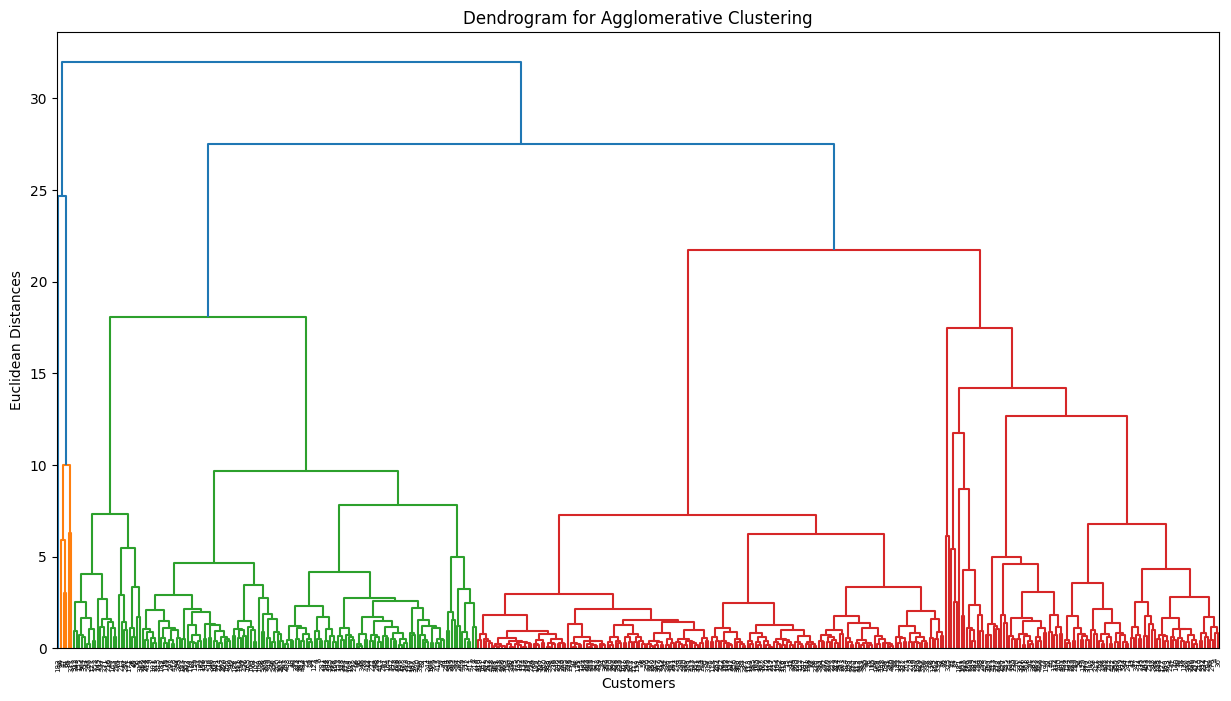

In [28]:
plt.figure(figsize=(15, 8))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.show()


In [30]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [31]:
optimal_n_clusters = 2

In [32]:
agg_clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters)
agg_labels = agg_clustering.fit_predict(scaled_data)


In [33]:
silhouette_avg_agg = silhouette_score(scaled_data, agg_labels)

print(f"For n_clusters = {optimal_n_clusters}, the Silhouette Score is: {silhouette_avg_agg:.4f}")


For n_clusters = 2, the Silhouette Score is: 0.7925


In [34]:
data['Agg_Cluster'] = agg_labels
print("\nFirst 5 rows with Agglomerative cluster labels:")
print(data.head())



First 5 rows with Agglomerative cluster labels:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  KMeans_Cluster  Agg_Cluster  
0        1338               0            0  
1        1776               3            0  
2        7844               3            0  
3        1788               0            0  
4        5185               2            0  


In [47]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

In [48]:
neighbors = NearestNeighbors(n_neighbors=12)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)


In [49]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1] 

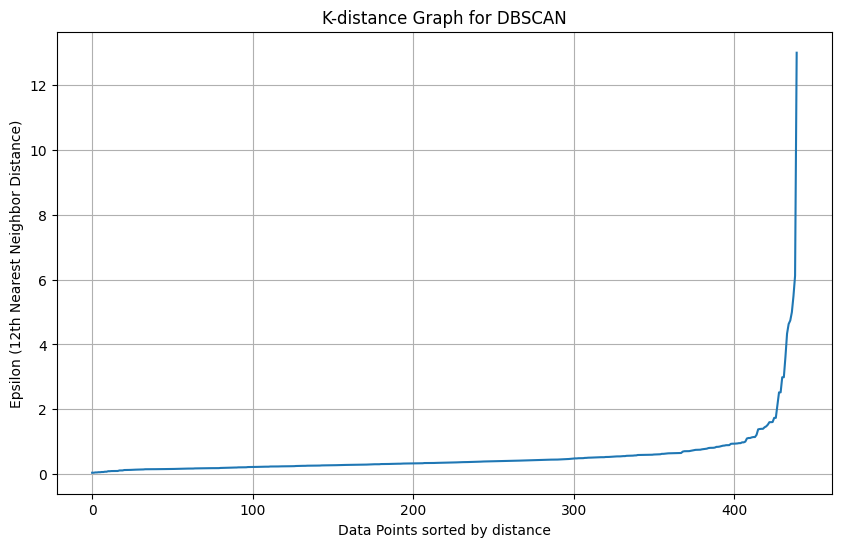

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon (12th Nearest Neighbor Distance)')
plt.grid(True)
plt.show()

In [54]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns

In [53]:
dbscan = DBSCAN(eps=1.8, min_samples=12)
dbscan_labels = dbscan.fit_predict(scaled_data)


In [55]:
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)


In [56]:
print(f'DBSCAN identified {n_clusters_} clusters and {n_noise_} noise points.')
data['DBSCAN_Cluster'] = dbscan_labels


DBSCAN identified 1 clusters and 20 noise points.


In [57]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


In [74]:
pca_df['KMeans_Cluster'] = data['KMeans_Cluster']
pca_df['Agg_Cluster'] = data['Agg_Cluster']
pca_df['DBSCAN_Cluster'] = data['DBSCAN_Cluster']


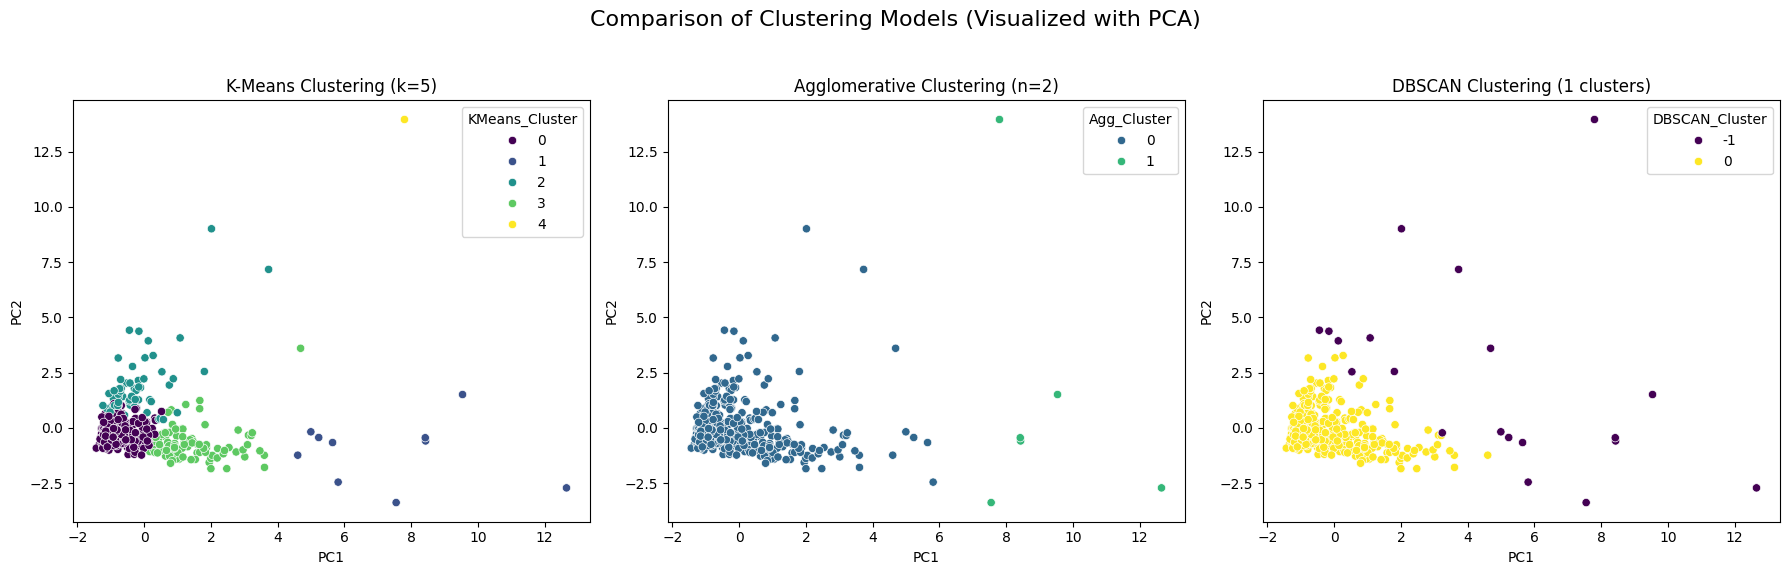

In [96]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='viridis', legend='full')
plt.title('K-Means Clustering (k=5)')

plt.subplot(1, 3, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Agg_Cluster', data=pca_df, palette='viridis', legend='full')
plt.title('Agglomerative Clustering (n=2)')

plt.subplot(1, 3, 3)
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=pca_df, palette='viridis', legend='full')
plt.title(f'DBSCAN Clustering ({n_clusters_} clusters)')

plt.suptitle('Comparison of Clustering Models (Visualized with PCA)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

